# File Load and Extract

This file will connect to an online book asset and load the data in the form of a png. The next step will use a google cloud API to extract the text on the page in png format.

In [5]:
# Imports

import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,datetime,time,math,itertools,os,sys,io

In [133]:
import requests
from PIL import Image,ImageFilter

In [61]:
from selenium import webdriver

# Fetch Data as PNGs from Online repository

Connect to the web page, and take a screenshots using the selenium library. Store to Dropbox! 

In [107]:
# Chrome Driver path, necessary for selenium library
DRIVERPATH = './../../7_HELPERFUNCTIONS/Drivers/chromedriver_win32/chromedriver.exe'

# Book path, with variable page number 
URLPATH = 'https://archive.org/details/remainsofoldlati02warmuoft/page/{}/mode/2up?view=theater'

# Store base path
STOREPATH = './../../../TF_Data/Dropbox/TF_data/TXT_Books/Source_LatinBook1/'

In [108]:
# Cast new driver
driver = webdriver.Chrome(DRIVERPATH)

# Also, store page lookup paths
lookup_dict = dict()

# Iterate pages, now set to between 70 and 80, in steps of 2
crange = range(70,80,2)

for pagenum in crange:
    # Get page
    driver.get(URLPATH.format(pagenum))
    # 3 seconds break
    time.sleep(3)
    # Take screenshot
    driver.get_screenshot_as_file(STOREPATH+'page_{}.png'.format(str(pagenum)))
    # Store for processing
    lookup_dict[pagenum] = STOREPATH+'page_{}.png'.format(str(pagenum))
    # Print progress
    if rnd.choice([False,True],p=[1-1/len(crange),1/len(crange)]): print('Processed page {0}/{1}'.format(pagenum,max(crange)))

# Release driver
driver.quit()

<ipython-input-108-34a8ef5044df>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(DRIVERPATH)


# Extract TXT from PNG file

Use OCE API with free key to convert the book into txt files.

In [109]:
apiKey = 'K89462531488957'

In [110]:
payload = {
    'isOverlayRequired':False,
    'apikey':apiKey
}

In [129]:
BASELINK = 'https://api.ocr.space/parse/image'

In [130]:
for cpath in lookup_dict.values():
    with open(cpath,'rb') as f:
        r = requests.post(
            BASELINK,
            files={cpath:f},
            data=payload
        )
    with open(cpath.replace('.png','.txt').replace('/Source_LatinBook1/','/Source_LatinBook1/TXT data/'),'w') as f:
        f.write(r.json()['ParsedResults'][0]['ParsedText'])

In [131]:
im = Image.open(lookup_dict[70])

In [132]:
im.show()

In [135]:
im.filter(ImageFilter.FIND_EDGES).show()

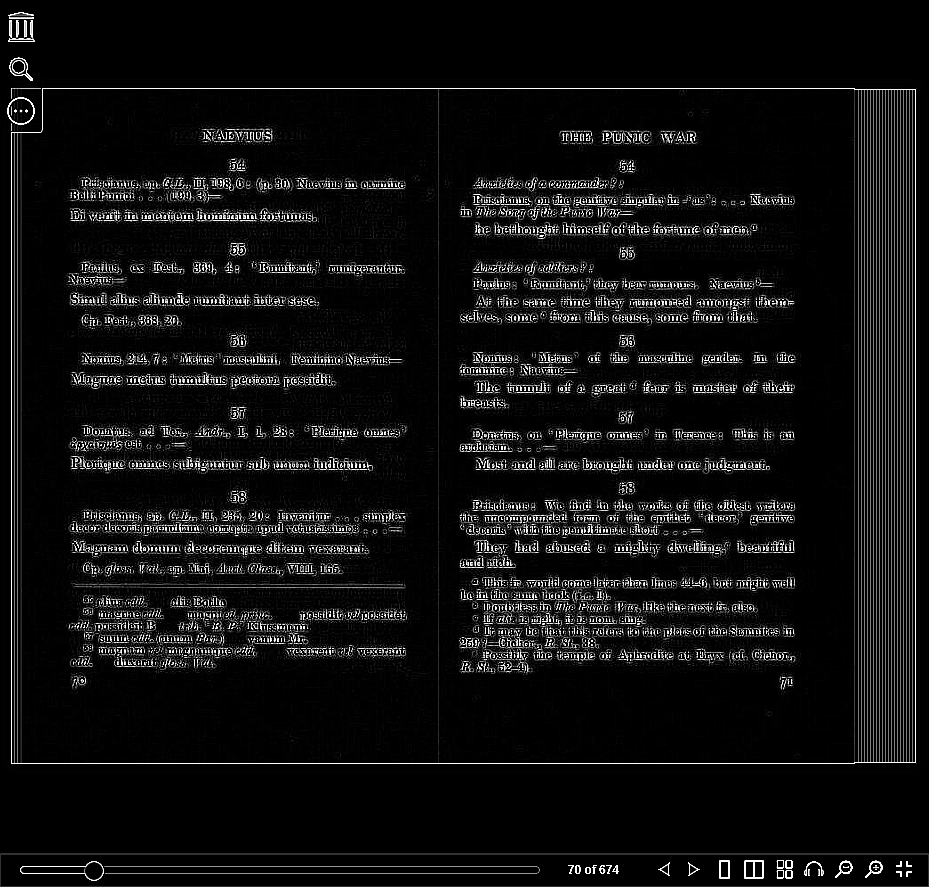

In [137]:
im.convert('L').filter(ImageFilter.FIND_EDGES)

In [153]:
im_cropped = im.crop((0,0,im.size[0]/2,im.size[1]))
im_cropped.save('C://Users/z003mxpm/Desktop/image.png')

In [154]:
im_cropped.show()